In [1]:
import psi4
import re as re
import matplotlib.pyplot as plt

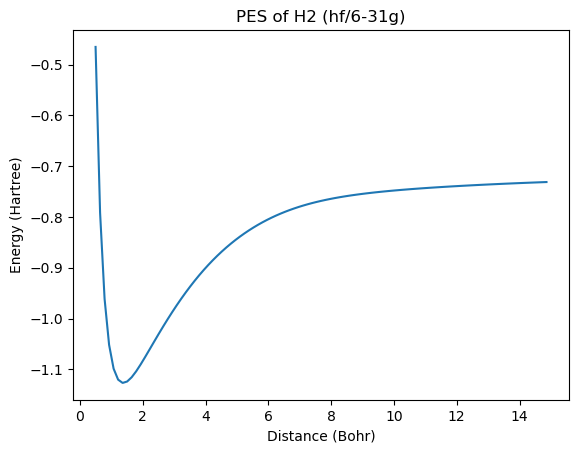

In [2]:
h2 = """
    0 1
    H 0.0 0.0 0.0
    H 0.0 0.0 R
    unit bohr
"""

method_basis = 'hf/6-31g'

N = 101
R_min = 0.5
R_max = 15.0

dr = (R_max - R_min)/N

Rvals = []
E = []
psi4.core.set_output_file('PES.out')
for i in range(N):
    dis = R_min + i*dr
    new_h2 = re.sub("R", str(dis), h2)
    Energy = psi4.energy(method_basis, molecule = psi4.geometry(new_h2))
    Rvals.append(dis)
    E.append(Energy)

fig, ax = plt.subplots()
ax.set_title('PES of H2 (%s)' %method_basis)
ax.set(xlabel = 'Distance (Bohr)', ylabel = 'Energy (Hartree)')
ax.plot(Rvals, E)
plt.show()